In [1]:
import matplotlib.pyplot as plt

Пункт 1

In [2]:
def vis_fig(figs):
    for koords in figs:
        x = [i[0] for i in koords] + [koords[0][0]]
        y = [i[1] for i in koords] + [koords[0][1]]
        plt.plot(x,y)
    plt.gca().set_aspect('equal')

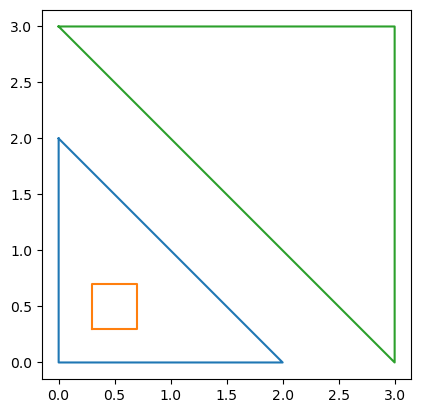

In [3]:
vis_fig([((0,2),(0,0),(2,0)), ((0.3,0.3),(0.3,0.7),(0.7,0.7),(0.7,0.3)), ((0,3),(3,3),(3,0))])

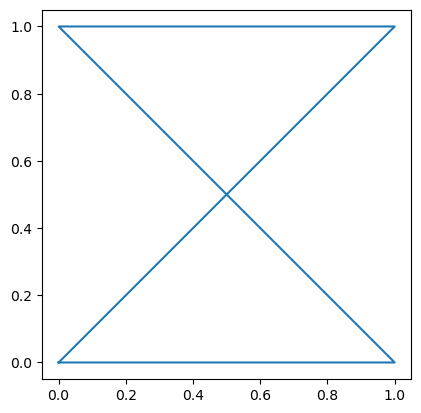

In [4]:
vis_fig([((0,0),(1,1),(0,1),(1,0))])

Пункт 2

In [5]:
def gen_rectangle(height, width, kolvo):
    rectangles = [((i*(width*1.2), 0),
                   (i*(width*1.2), height),
                   (width + i*(width*1.2), height),
                   (width + i*(width*1.2), 0)) for i in range(kolvo)]
    return rectangles

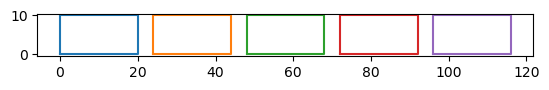

In [6]:
vis_fig(gen_rectangle(10,20,5))

In [7]:
def gen_triangle(side_y, side_x, kolvo):
    triangles = [((i*(side_x*1.2), 0),
                  (i*(side_x*1.2), side_y),
                  (side_x + i*(side_x*1.2), 0)) for i in range(kolvo)]
    return triangles

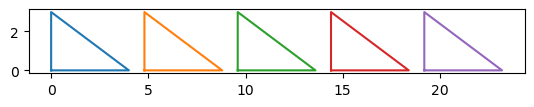

In [8]:
vis_fig(gen_triangle(3,4,5))

In [9]:
def gen_hexagon(side, kolvo):
    r = side*3**0.5/2
    hexagons = [((i*(side*2.2), 0),
                 (side + i*(side*2.2), 0),
                 (side*1.5 + i*(side*2.2), r),
                 (side + i*(side*2.2) , 2*r),
                 (i*(side*2.2) , 2*r),
                 (side*(-0.5) + i*(side*2.2), r)) for i in range(kolvo)]
    return hexagons

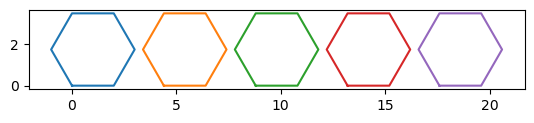

In [10]:
vis_fig(gen_hexagon(2,5))

In [11]:
from random import choice
figs = []
while (figs.count('r') == 0) or (figs.count('h') == 0) or (figs.count('t') == 0):
    figs = [choice('rht') for i in range(7)]
figs

['t', 'h', 'r', 'r', 'r', 'r', 'r']

In [12]:
def gen_seven(figs, width, height, side_x, side_y, side):
    coords = []
    x_zan = 0
    const = max(width, side_x, side)
    for fig in figs:
        if fig == 'r':
            coords.append(((x_zan, 0),
                           (x_zan, height),
                           (x_zan + width, height),
                           (x_zan + width, 0)))
            x_zan = (x_zan + 2*width) + const
        if fig == 't':
            coords.append(((x_zan, 0),
                          (x_zan, side_y),
                          (x_zan + side_x, 0)))
            x_zan = (x_zan + 2*side_x) + const
        if fig == 'h':
            r = side*3**0.5/2
            coords.append(((x_zan, 0),
                         (x_zan + side, 0),
                         (x_zan + side*1.5, r),
                         (x_zan + side, 2*r),
                         (x_zan, 2*r),
                         (x_zan + side*(-0.5), r)))
            x_zan = (x_zan + 2*side) + const
    return coords

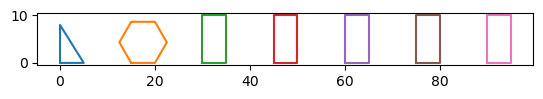

In [13]:
vis_fig(gen_seven(figs, 5, 10, 5, 8, 5))

Пункт 3

In [14]:
def tr_translate(posled, x_change, y_change):
    new_posl = []
    for i in posled:
        kortej = []
        for j in i:
            kortej.append((j[0] + x_change, j[1] + y_change))
        new_posl.append(tuple(kortej))
    return new_posl

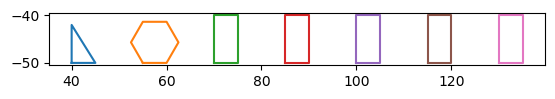

In [15]:
vis_fig(tr_translate(gen_seven(figs, 5, 10, 5, 8, 5), 40, -50))

In [16]:
import math
def tr_rotate(posled, deg):
    rad = math.radians(deg)
    center = (posled[0][0][0], posled[0][0][1])
    new_posl = []
    for i in posled:
        kortej = []
        for j in i:
            kortej.append(((center[0] + (j[0] - center[0])*math.cos(rad) - (j[1] - center[1])*math.sin(rad)), 
                           (center[1] + (j[0] - center[0])*math.sin(rad) + (j[1] - center[1])*math.cos(rad))))
        new_posl.append(tuple(kortej))
    return new_posl

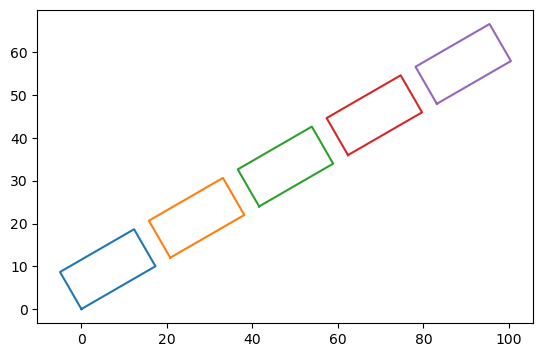

In [17]:
vis_fig(tr_rotate(gen_rectangle(10,20,5), 30))

In [18]:
def tr_symmetry(posled, line_of_symmetrize):
    new_posl = []
    for i in posled:
        kortej = []
        for j in i:
            kortej.append((j[0], j[1] + 2*(line_of_symmetrize - j[1])))
        new_posl.append(tuple(kortej))
    return new_posl

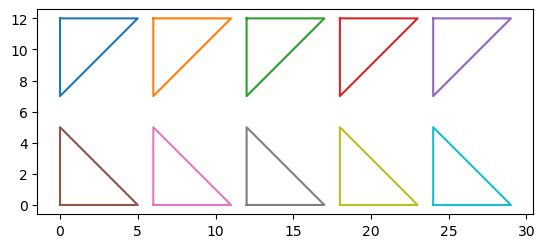

In [19]:
vis_fig(tr_symmetry(gen_triangle(5,5,5), 6))
vis_fig(gen_triangle(5,5,5))

In [20]:
def tr_homothety(posled, center, k):
    new_posl = []
    for i in posled:
        kortej = []
        for j in i:
            r1 = j[0] - center[0]
            r2 = j[1] - center[1]
            kortej.append((j[0] - r1*(k+1), j[1] - r2*(k+1)))
        new_posl.append(tuple(kortej))
    return new_posl

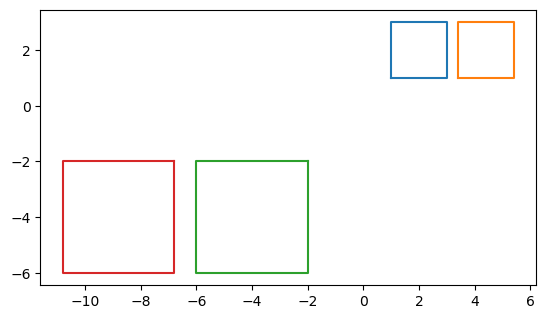

In [21]:
orig = tr_translate(gen_rectangle(2,2,2), 1, 1)
vis_fig(orig + tr_homothety(orig, (0,0), 2))

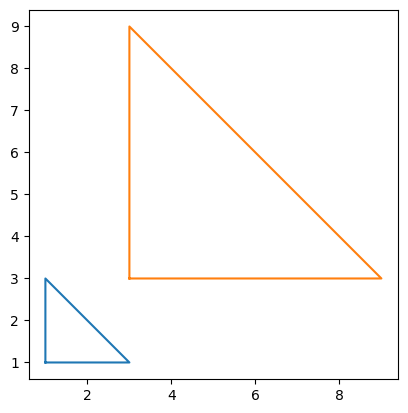

In [22]:
orig = tr_translate(gen_triangle(2,2,1), 1, 1)
vis_fig(orig + tr_homothety(orig, (0,0), -3))

Пункт 4

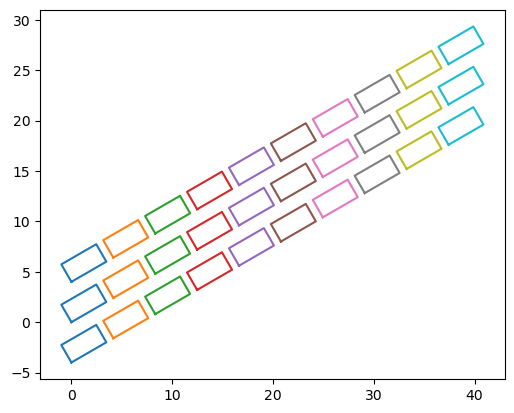

In [23]:
#4.1
sred = tr_rotate(gen_rectangle(2,4,10), 30)
verx = tr_translate(sred, 0, 4)
niz = tr_translate(sred, 0, -4)
vis_fig(verx + sred + niz)

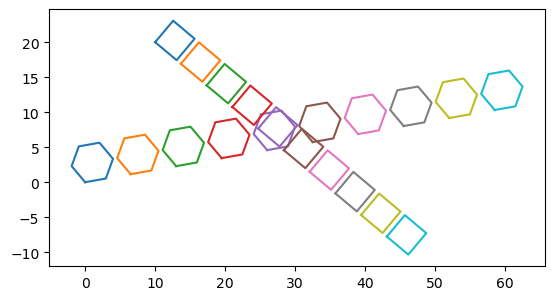

In [24]:
#4.2
perv = tr_rotate(gen_hexagon(3, 10), 10)
vtor = tr_translate(tr_rotate(gen_rectangle(4,4,10), -40), 10, 20)
vis_fig(perv + vtor)

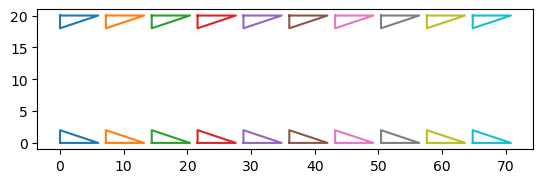

In [25]:
#4.3
vis_fig(tr_symmetry(gen_triangle(2,6,10), 10) + gen_triangle(2,6,10))

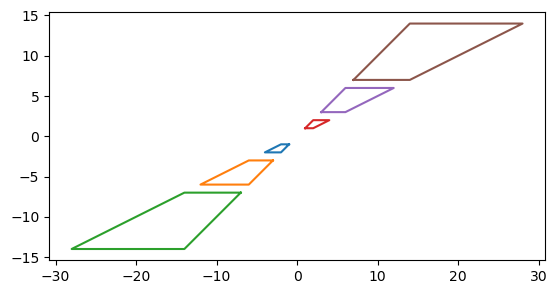

In [26]:
#4.4
trap = [((i, i), (2*i, i), (4*i, 2*i), (2*i, 2*i)) for i in range(1,10,2)]
trap_done = []
for i in range(len(trap)):
    if str(i) in '013':
        trap_done.append(trap[i])
vis_fig(tr_homothety(trap_done, (0,0), 1) + trap_done)

Пункт 5

In [27]:
def fit_angle_point(posled, points_check):
    filtrate = []
    for fig in posled:
        for point in fig:
            if point in points_check:
                filtrate.append(fig)
    return filtrate

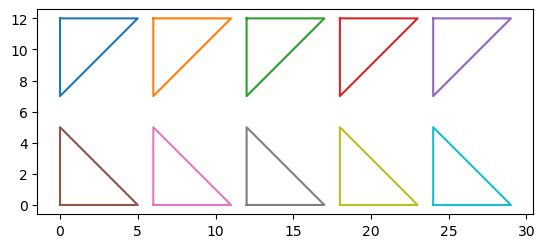

In [28]:
vis_fig(tr_symmetry(gen_triangle(5,5,5), 6) + gen_triangle(5,5,5))

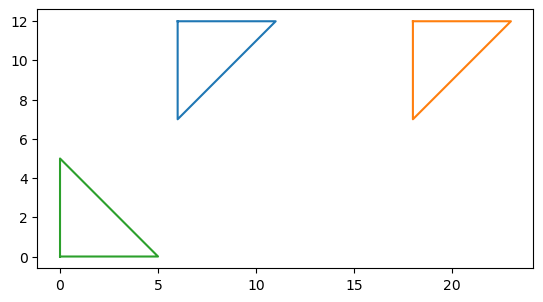

In [29]:
vis_fig(fit_angle_point(tr_symmetry(gen_triangle(5,5,5), 6) + gen_triangle(5,5,5), [(0,0), (6,7), (18, 12)]))

In [30]:
def fit_short_side(posled, shortyk):
    filtrate = []
    for fig in posled:
        sides = []
        for i in range(len(fig)):
            try:
                sides.append(((fig[i][0] - fig[i+1][0])**2 + (fig[i][1] - fig[i+1][1])**2)**0.5)
            except:
                sides.append(((fig[0][0] - fig[-1][0])**2 + (fig[0][1] - fig[-1][1])**2)**0.5)
        if min(sides) < shortyk:
            filtrate.append(fig)
    return filtrate

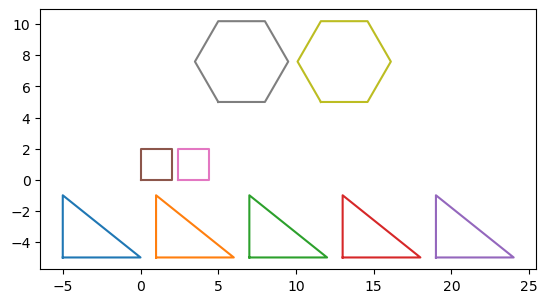

In [31]:
vis_fig((tr_translate(gen_triangle(4,5,5), -5, -5) + gen_rectangle(2,2,2) + tr_translate(gen_hexagon(3, 2), 5, 5)))

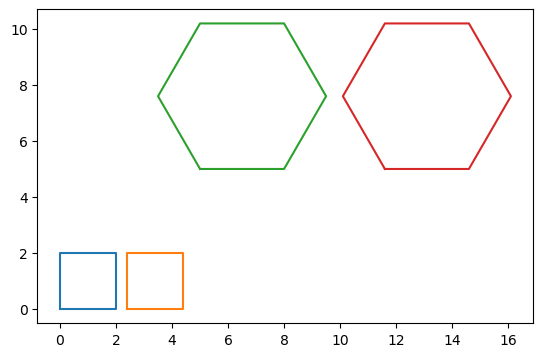

In [32]:
vis_fig(fit_short_side((tr_translate(gen_triangle(4,4,5), -5, -5) + gen_rectangle(2,2,2) + tr_translate(gen_hexagon(3, 2), 5, 5)), 4))

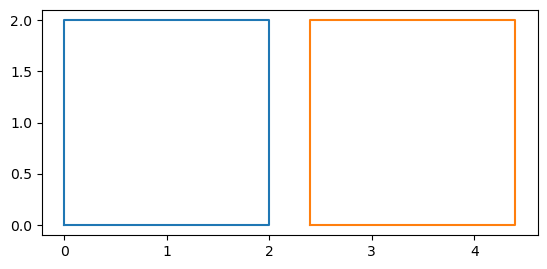

In [33]:
vis_fig(fit_short_side((gen_triangle(4,4,5) + gen_rectangle(2,2,2) + tr_translate(gen_hexagon(3, 2), 5, 5)), 3))

Пункт 6

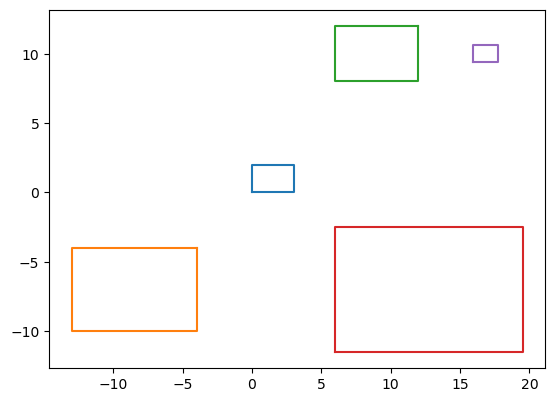

In [34]:
fig_1 = gen_rectangle(2,3,1)
fig_2 = tr_homothety(fig_1, (-1, -1), 3)
fig_3 = tr_homothety(fig_1, (4,4), 2)
fig_4 = tr_homothety(fig_2, (0,-7), 1.5)
fig_5 = tr_homothety(fig_3, (15,10), 0.3)
rect = fig_1 + fig_2 + fig_3 + fig_4 + fig_5
vis_fig(rect)

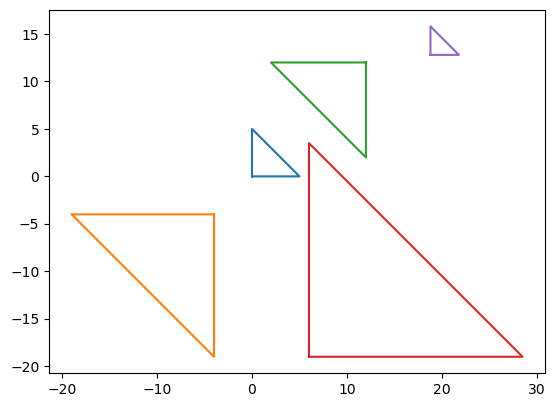

In [35]:
fig_6 = gen_triangle(5,5,1)
fig_7 = tr_homothety(fig_6, (-1, -1), 3)
fig_8 = tr_homothety(fig_6, (4,4), 2)
fig_9 = tr_homothety(fig_7, (0,-10), 1.5)
fig_10 = tr_homothety(fig_7, (15,10), 0.2)
tri = fig_6 + fig_7 + fig_8 + fig_9 + fig_10
vis_fig(tri)

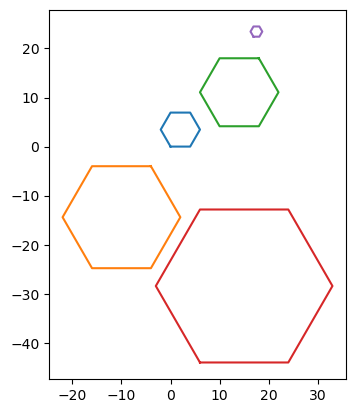

In [36]:
fig_11 = gen_hexagon(4,1)
fig_12 = tr_homothety(fig_11, (-1, -1), 3)
fig_13 = tr_homothety(fig_11, (6,6), 2)
fig_14 = tr_homothety(fig_12, (0,-20), 1.5)
fig_15 = tr_homothety(fig_12, (15,20), 0.1)
hexag = fig_11 + fig_12 + fig_13 + fig_14 + fig_15
vis_fig(hexag)

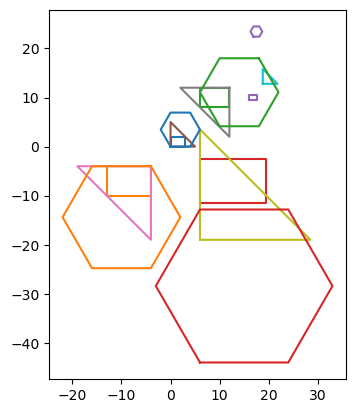

In [37]:
vis_fig(rect + tri + hexag)

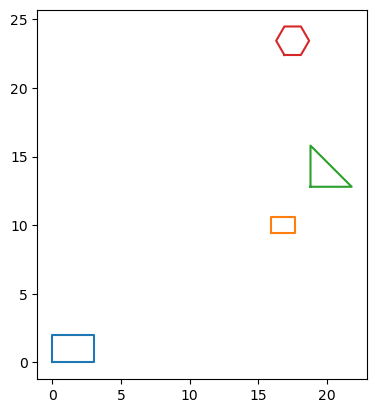

In [38]:
vis_fig(fit_short_side(rect + tri + hexag, 4))